<a href="https://colab.research.google.com/github/mchirico/COVID-19/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID-19**

Note:  You need to make a copy of this note book, if you want to run it yourself
by clicking on "File/Save a copy in Drive"



Sharable link:
https://colab.research.google.com/drive/1RZXskxLFGTMcw7Q88VwIWk7vSceGbIkf







Data From: 
[JHU CSSE](https://github.com/CSSEGISandData/COVID-19)



In [0]:
import requests
import pandas as pd
import numpy as np 
from datetime import datetime



import warnings
warnings.filterwarnings("ignore")

try:
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.dates as mdates
  sns.set(style="white", color_codes=True)
  from matplotlib_venn import venn2
  import keras
  import pydot
  import libarchive
  import torch
except:
  print("Will try to install software")
  # Lines below .... Only need to be run once at the top of the notebook.
  !pip install -q matplotlib-venn
  !pip install -q keras
  # #   https://pypi.python.org/pypi/pydot
  !apt-get -qq install -y graphviz && pip install -q pydot
  !apt-get -qq install -y libarchive-dev && pip install -q -U libarchive
  !pip install -U -q PyDrive
  !pip install --upgrade -q gspread
  
  !pip install torchvision
  
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.dates as mdates
  sns.set(style="white", color_codes=True)
  from matplotlib_venn import venn2
  import keras
  import pydot
  import libarchive





## Reading in the data..

#### Read in Confirmed Cases

In [101]:
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
d=pd.read_csv(url)
d.head()


d[d['Country/Region']=='US']
cols = d.columns[0:3].tolist() + d.columns[-9::].tolist()

d[d['Country/Region']=='US'][cols]


,Province/State,Country/Region,Lat,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
33,"King County, WA",US,47.6062,14,21,31,51,58,71,83,83,116
34,"Cook County, IL",US,41.7377,4,4,4,5,5,6,7,7,11
40,"Los Angeles, CA",US,34.0522,1,1,7,11,13,14,14,14,20
56,"San Benito, CA",US,36.5761,2,2,2,2,2,2,2,2,2
59,"San Diego County, CA",US,32.7157,2,2,2,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
342,"Dane, WI",US,43.0186,0,0,0,0,0,0,0,0,2
343,"Pierce, WI",US,44.7509,0,0,0,0,0,0,0,0,1
344,"Cuyahoga, OH",US,41.4339,0,0,0,0,0,0,0,0,3
345,"Weber, UT",US,41.2603,0,0,0,0,0,0,0,0,1


In [0]:
# Deaths
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
dt=pd.read_csv(url)
dt.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4,4,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,5,7,8,8,8,8,8,8,8,8,8,8,8
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,3,3,4,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [0]:
# Recovered
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
dr=pd.read_csv(url)
dr.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,0,2,2,3,5,7,14,20,23,34,47,59,72,88,105,127,157,193,221,255,280,361,413,474,539,597,637,663,712,744,792,821,868,873,917,936,956,970,979,979,984,984,984
1,Beijing,Mainland China,40.1824,116.4142,0,0,1,2,2,2,4,4,4,5,9,9,12,23,24,31,33,34,37,44,48,56,69,80,98,108,114,122,145,153,169,178,189,198,215,235,248,257,271,276,282,288,297,297,299,303,308,315,320
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,0,1,1,1,3,7,9,9,15,24,31,39,51,66,79,102,128,152,184,207,225,254,274,299,316,328,335,349,372,384,401,422,438,450,469,490,502,512,513,526,527,542,547
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,0,0,0,0,0,0,1,3,11,14,20,24,35,39,45,53,57,63,71,82,90,93,112,126,149,162,170,183,199,218,228,235,243,247,255,260,270,277,284,295,295,295,295
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,0,0,0,0,0,3,3,4,6,6,9,12,16,17,24,31,39,39,49,54,58,62,65,71,76,76,78,80,80,81,81,82,82,84,85,86,87,87,87,87,87,88,88


In [0]:
# Confirmed
m=pd.melt(d, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_vars=d.columns[4::])
m.columns = ['Province/State', 'Country/Region', 'Lat', 'Long', 'timeStamp', 'value']
m['timeStamp'] = m['timeStamp'].apply(lambda x: datetime.strptime(x,'%m/%d/%y'))
m.head()

,Province/State,Country/Region,Lat,Long,timeStamp,value
0,Anhui,Mainland China,31.8257,117.2264,2020-01-22,1
1,Beijing,Mainland China,40.1824,116.4142,2020-01-22,14
2,Chongqing,Mainland China,30.0572,107.8740,2020-01-22,6
3,Fujian,Mainland China,26.0789,117.9874,2020-01-22,1
4,Gansu,Mainland China,36.0611,103.8343,2020-01-22,0


In [0]:
# deaths
mt=pd.melt(dt, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_vars=d.columns[4::])
mt.columns = ['Province/State', 'Country/Region', 'Lat', 'Long', 'timeStamp', 'value']
mt['timeStamp'] = mt['timeStamp'].apply(lambda x: datetime.strptime(x,'%m/%d/%y'))
mt.head()

,Province/State,Country/Region,Lat,Long,timeStamp,value
0,Anhui,Mainland China,31.8257,117.2264,2020-01-22,0
1,Beijing,Mainland China,40.1824,116.4142,2020-01-22,0
2,Chongqing,Mainland China,30.0572,107.8740,2020-01-22,0
3,Fujian,Mainland China,26.0789,117.9874,2020-01-22,0
4,Gansu,Mainland China,36.0611,103.8343,2020-01-22,0


In [0]:
# Recovered
mr=pd.melt(dr, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_vars=d.columns[4::])
mr.columns = ['Province/State', 'Country/Region', 'Lat', 'Long', 'timeStamp', 'value']
mr['timeStamp'] = mr['timeStamp'].apply(lambda x: datetime.strptime(x,'%m/%d/%y'))
mr.head()

,Province/State,Country/Region,Lat,Long,timeStamp,value
0,Anhui,Mainland China,31.8257,117.2264,2020-01-22,0
1,Beijing,Mainland China,40.1824,116.4142,2020-01-22,0
2,Chongqing,Mainland China,30.0572,107.8740,2020-01-22,0
3,Fujian,Mainland China,26.0789,117.9874,2020-01-22,0
4,Gansu,Mainland China,36.0611,103.8343,2020-01-22,0


## Summary Tables

In [0]:
n=pd.pivot_table(m, values='value', index=['Province/State', 'Country/Region', 'Lat', 'Long'],
                    columns=['timeStamp'], aggfunc=np.sum)
ns=pd.pivot_table(m, values='value', index=['Country/Region'],
                    columns=['timeStamp'], aggfunc=np.sum)
ns = ns.diff(axis=1)
ns=ns.reset_index()

ns[ns['Country/Region']=='US'].head()
t = pd.pivot_table(m, values='value', index=['Country/Region'],
                    columns=['timeStamp'], aggfunc=np.sum)
t = t.reset_index()
t[t['Country/Region']=='US']

timeStamp,Country/Region,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,2020-02-09 00:00:00,2020-02-10 00:00:00,2020-02-11 00:00:00,2020-02-12 00:00:00,2020-02-13 00:00:00,2020-02-14 00:00:00,2020-02-15 00:00:00,2020-02-16 00:00:00,2020-02-17 00:00:00,2020-02-18 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,2020-02-21 00:00:00,2020-02-22 00:00:00,2020-02-23 00:00:00,2020-02-24 00:00:00,2020-02-25 00:00:00,2020-02-26 00:00:00,2020-02-27 00:00:00,2020-02-28 00:00:00,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00,2020-03-07 00:00:00,2020-03-08 00:00:00,2020-03-09 00:00:00,2020-03-10 00:00:00
110,US,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,51,51,57,58,60,68,74,98,118,149,217,267,403,518,584,1670


In [0]:
# Deaths
nt=pd.pivot_table(mt, values='value', index=['Province/State', 'Country/Region', 'Lat', 'Long'],
                    columns=['timeStamp'], aggfunc=np.sum)
nst=pd.pivot_table(mt, values='value', index=['Country/Region'],
                    columns=['timeStamp'], aggfunc=np.sum)
nst = nst.diff(axis=1)
nst=nst.reset_index()
nst.columns
nst[nst[nst.columns[44]]>0]

timeStamp,Country/Region,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,2020-02-09 00:00:00,2020-02-10 00:00:00,2020-02-11 00:00:00,2020-02-12 00:00:00,2020-02-13 00:00:00,2020-02-14 00:00:00,2020-02-15 00:00:00,2020-02-16 00:00:00,2020-02-17 00:00:00,2020-02-18 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,2020-02-21 00:00:00,2020-02-22 00:00:00,2020-02-23 00:00:00,2020-02-24 00:00:00,2020-02-25 00:00:00,2020-02-26 00:00:00,2020-02-27 00:00:00,2020-02-28 00:00:00,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00,2020-03-07 00:00:00,2020-03-08 00:00:00,2020-03-09 00:00:00,2020-03-10 00:00:00
36,France,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,3.0,2.0,8.0,0.0,14.0
48,Iran (Islamic Republic of),NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,3.0,4.0,4.0,3.0,7.0,8.0,9.0,11.0,12.0,11.0,15.0,15.0,17.0,21.0,49.0,43.0,54.0
52,Italy,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,3.0,2.0,5.0,4.0,8.0,5.0,18.0,27.0,28.0,41.0,49.0,36.0,133.0,97.0,168.0
62,Mainland China,NaN,1.0,8.0,16.0,14.0,26.0,49.0,2.0,38.0,42.0,46.0,102.0,64.0,65.0,72.0,70.0,85.0,87.0,100.0,107.0,100.0,5.0,252.0,152.0,142.0,103.0,98.0,139.0,112.0,122.0,0.0,205.0,2.0,150.0,70.0,52.0,29.0,44.0,47.0,35.0,42.0,33.0,36.0,32.0,29.0,28.0,27.0,23.0,16.0
101,Spain,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,5.0,7.0,11.0,7.0
104,Switzerland,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
109,UK,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0
110,US,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,4.0,1.0,2.0,3.0,4.0,1.0,34.0


In [0]:

ns.head()

timeStamp,Country/Region,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,2020-02-09 00:00:00,2020-02-10 00:00:00,2020-02-11 00:00:00,2020-02-12 00:00:00,2020-02-13 00:00:00,2020-02-14 00:00:00,2020-02-15 00:00:00,2020-02-16 00:00:00,2020-02-17 00:00:00,2020-02-18 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,2020-02-21 00:00:00,2020-02-22 00:00:00,2020-02-23 00:00:00,2020-02-24 00:00:00,2020-02-25 00:00:00,2020-02-26 00:00:00,2020-02-27 00:00:00,2020-02-28 00:00:00,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00,2020-03-07 00:00:00,2020-03-08 00:00:00,2020-03-09 00:00:00,2020-03-10 00:00:00
0,Afghanistan,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0
1,Albania,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0
2,Algeria,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,7.0,0.0,5.0,0.0,2.0,1.0,0.0
3,Andorra,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Argentina,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,4.0,0.0,5.0


In [0]:
ns[ns['Country/Region']=='US']

timeStamp,Country/Region,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,2020-02-09 00:00:00,2020-02-10 00:00:00,2020-02-11 00:00:00,2020-02-12 00:00:00,2020-02-13 00:00:00,2020-02-14 00:00:00,2020-02-15 00:00:00,2020-02-16 00:00:00,2020-02-17 00:00:00,2020-02-18 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,2020-02-21 00:00:00,2020-02-22 00:00:00,2020-02-23 00:00:00,2020-02-24 00:00:00,2020-02-25 00:00:00,2020-02-26 00:00:00,2020-02-27 00:00:00,2020-02-28 00:00:00,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00,2020-03-07 00:00:00,2020-03-08 00:00:00,2020-03-09 00:00:00,2020-03-10 00:00:00
110,US,NaN,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,36.0,0.0,6.0,1.0,2.0,8.0,6.0,24.0,20.0,31.0,68.0,50.0,136.0,115.0,66.0,1086.0


In [0]:
nm=pd.melt(ns, id_vars=['Country/Region'], value_vars=ns.columns[1::])
nm.head(7)

,Country/Region,timeStamp,value
0,Afghanistan,2020-01-22,NaN
1,Albania,2020-01-22,NaN
2,Algeria,2020-01-22,NaN
3,Andorra,2020-01-22,NaN
4,Argentina,2020-01-22,NaN
5,Armenia,2020-01-22,NaN
6,Australia,2020-01-22,NaN


In [92]:
nm[nm['Country/Region']=='US']

,Country/Region,timeStamp,value
110,US,2020-01-22,NaN
225,US,2020-01-23,0.0
340,US,2020-01-24,1.0
455,US,2020-01-25,0.0
570,US,2020-01-26,3.0
685,US,2020-01-27,0.0
800,US,2020-01-28,0.0
915,US,2020-01-29,0.0
1030,US,2020-01-30,0.0
1145,US,2020-01-31,2.0


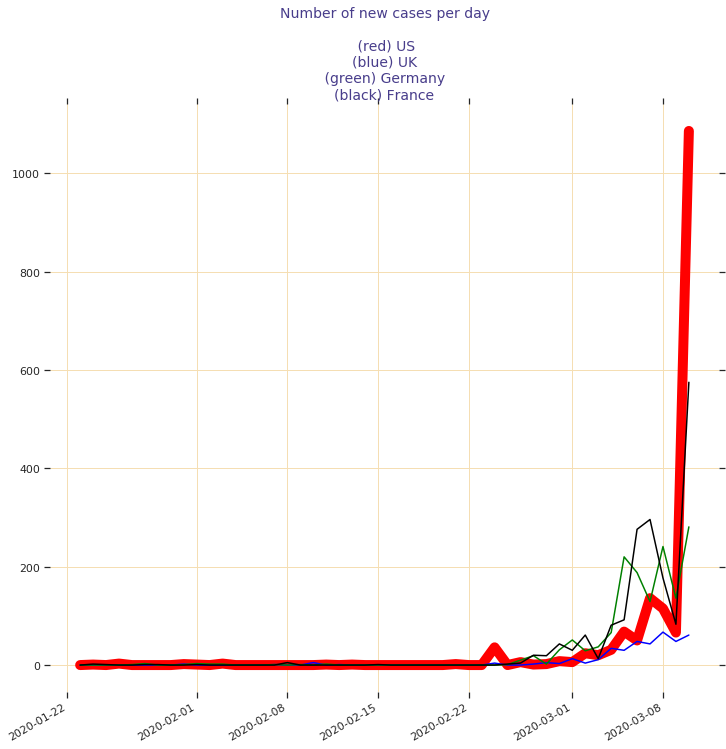

In [0]:

t=nm[nm['Country/Region']=='US']
t2=nm[nm['Country/Region']=='UK']
t3=nm[nm['Country/Region']=='Germany']
t4=nm[nm['Country/Region']=='France']



from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(12,12))



ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 


ax.plot(t['timeStamp'],t['value'],color = 'red',linewidth=10)
ax.plot(t2['timeStamp'],t2['value'],color = 'blue')
ax.plot(t3['timeStamp'],t3['value'],color = 'green')
ax.plot(t3['timeStamp'],t4['value'],color = 'black')


ax.set_title("""Number of new cases per day
\n (red) US\n(blue) UK\n (green) Germany \n(black) France""", 
             fontsize=14, color='darkslateblue')


ax.grid(b=True, which='major', color='wheat', linestyle='-')


plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")  


 

fig.autofmt_xdate()
plt.show()

In [0]:

mySet = list(nm[nm['value'] > 50]['Country/Region'].drop_duplicates())

t = nm[nm['Country/Region'].isin(mySet)]
p = pd.pivot_table(t, values='value', index=['timeStamp'], columns=['Country/Region'], aggfunc=np.sum)


# 1 week intervals
pp = p.resample('7d').apply(np.sum).reset_index()
pp.head(400)

Country/Region,timeStamp,Austria,Belgium,Denmark,France,Germany,Iran (Islamic Republic of),Italy,Japan,Mainland China,Netherlands,Norway,Others,Republic of Korea,Spain,Sweden,Switzerland,UK,US
0,2020-01-22,0.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,4947.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0
1,2020-01-29,0.0,1.0,0.0,2.0,8.0,0.0,2.0,15.0,18186.0,0.0,0.0,0.0,12.0,1.0,1.0,0.0,2.0,6.0
2,2020-02-05,0.0,0.0,0.0,5.0,4.0,0.0,1.0,4.0,20647.0,0.0,0.0,135.0,12.0,1.0,0.0,0.0,6.0,1.0
3,2020-02-12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,48.0,29812.0,0.0,0.0,407.0,3.0,0.0,0.0,0.0,1.0,1.0
4,2020-02-19,2.0,0.0,0.0,2.0,1.0,95.0,319.0,96.0,3521.0,0.0,0.0,149.0,946.0,4.0,0.0,1.0,4.0,38.0
5,2020-02-26,19.0,12.0,6.0,190.0,179.0,2241.0,2180.0,123.0,2491.0,24.0,32.0,15.0,4209.0,159.0,20.0,55.0,38.0,67.0
6,2020-03-04,161.0,254.0,256.0,1580.0,1261.0,5706.0,7647.0,288.0,606.0,358.0,368.0,-10.0,2327.0,1530.0,334.0,435.0,331.0,1552.0


In [0]:
# Deaths
nmt=pd.melt(nst, id_vars=['Country/Region'], value_vars=ns.columns[1::])



mySet = list(nmt[nmt['value'] > 1]['Country/Region'].drop_duplicates())

t = nmt[nmt['Country/Region'].isin(mySet)]
p = pd.pivot_table(t, values='value', index=['timeStamp'], columns=['Country/Region'], aggfunc=np.sum)


# 1 week intervals
pp = p.resample('7d').apply(np.sum).reset_index()
pp.head(400)

Country/Region,timeStamp,France,Germany,Iran (Islamic Republic of),Iraq,Italy,Japan,Mainland China,Netherlands,Others,Republic of Korea,Spain,UK,US
0,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-29,0.0,0.0,0.0,0.0,0.0,0.0,359.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-05,0.0,0.0,0.0,0.0,0.0,0.0,621.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-12,1.0,0.0,0.0,0.0,0.0,1.0,891.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-19,0.0,0.0,16.0,0.0,10.0,0.0,661.0,0.0,3.0,10.0,0.0,0.0,0.0
5,2020-02-26,3.0,0.0,61.0,0.0,69.0,5.0,282.0,0.0,3.0,18.0,1.0,0.0,7.0
6,2020-03-04,29.0,2.0,214.0,7.0,552.0,4.0,191.0,4.0,0.0,26.0,34.0,6.0,49.0


In [0]:
nst[nst['Country/Region']=='US']

timeStamp,Country/Region,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,2020-02-09 00:00:00,2020-02-10 00:00:00,2020-02-11 00:00:00,2020-02-12 00:00:00,2020-02-13 00:00:00,2020-02-14 00:00:00,2020-02-15 00:00:00,2020-02-16 00:00:00,2020-02-17 00:00:00,2020-02-18 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,2020-02-21 00:00:00,2020-02-22 00:00:00,2020-02-23 00:00:00,2020-02-24 00:00:00,2020-02-25 00:00:00,2020-02-26 00:00:00,2020-02-27 00:00:00,2020-02-28 00:00:00,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00,2020-03-07 00:00:00,2020-03-08 00:00:00,2020-03-09 00:00:00,2020-03-10 00:00:00
110,US,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,4.0,1.0,2.0,3.0,4.0,1.0,34.0
